<a href="https://colab.research.google.com/github/kabuck/co-op-code/blob/main/PyCaret_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret --user

In [ ]:
import pycaret
from pycaret.datasets import *

In [ ]:
#Import Libraries
import pandas as pd

#Import/Download Data
from google.colab import files
uploaded = files.upload()
import io

Saving ds1.csv to ds1.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['ds1.csv']))

In [ ]:
print(df.shape)
df.head(5)

#Format the data

headers = ["Alloy No.", "Al", "Co", "Cr", "Cu", "Fe", "Ni", "Hardness"]
df.columns = headers #Changes the headers
df.drop([0,0], inplace=True) #removes the extra headers
print(df.head(5))
df = df[["Al", "Co", 'Cr', 'Cu', "Fe", "Ni", "Hardness"]].astype("float")
df.info()
print(df.min)
df.head(5)


#Add categorical data: hard or soft
'''
Hard = 2
Soft = 1
Average = 0
'''

df.loc[(df["Hardness"] >= 700), "ID"] = 2
df.loc[(df["Hardness"] <= 550), "ID"] = 1
df.loc[((df["Hardness"] > 550) & (df["Hardness"] < 700)), "ID"] = 0

print(df["ID"].value_counts())

df = df[["Al", "Co", 'Cr', 'Cu', "Fe", "Ni", "ID"]].astype("float")
print(df.head(5))

(156, 8)
   Alloy No.    Al    Co    Cr    Cu    Fe    Ni  Hardness
1        1.0  18.2   9.1  18.2  18.2  18.2  18.2     473.0
2        2.0  18.2  18.2   9.1  18.2  18.2  18.2     367.0
3        3.0  18.2  18.2  18.2  18.2   9.1  18.2     418.0
4        4.0  18.2  18.2  18.2  18.2  18.2   9.1     423.0
5        5.0   5.3  21.1  21.1     0  26.3  26.3     168.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 1 to 155
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Al        155 non-null    float64
 1   Co        155 non-null    float64
 2   Cr        155 non-null    float64
 3   Cu        155 non-null    float64
 4   Fe        155 non-null    float64
 5   Ni        155 non-null    float64
 6   Hardness  155 non-null    float64
dtypes: float64(7)
memory usage: 9.7 KB
<bound method DataFrame.min of        Al    Co    Cr    Cu    Fe    Ni  Hardness
1    18.2   9.1  18.2  18.2  18.2  18.2     473.0
2    18.2  

In [ ]:
from pycaret.regression import *
regr1 = setup(data = df, target = "ID", train_size = 0.7)

,Description,Value
0,session_id,2550
1,Target,ID
2,Original Data,"(155, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(108, 6)"


In [ ]:
#Return best model
best = compare_models(fold = 10, sort = "MSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.2653,0.1869,0.3947,0.1866,0.2492,0.1410,0.064
omp,Orthogonal Matching Pursuit,0.3526,0.2537,0.4760,-0.1715,0.3028,0.1808,0.013
llar,Lasso Least Angle Regression,0.3734,0.2552,0.4843,-0.1879,0.3090,0.1957,0.013
lasso,Lasso Regression,0.3760,0.2627,0.4897,-0.2257,0.3121,0.1968,0.014
en,Elastic Net,0.3689,0.2667,0.4886,-0.2318,0.3116,0.1900,0.015
rf,Random Forest Regressor,0.2992,0.2680,0.4591,-0.1181,0.2837,0.1447,0.414
et,Extra Trees Regressor,0.2893,0.2698,0.4527,-0.0736,0.2779,0.1438,0.359
br,Bayesian Ridge,0.3743,0.2733,0.4946,-0.2719,0.3152,0.1942,0.014
lightgbm,Light Gradient Boosting Machine,0.3585,0.2744,0.4939,-0.2423,0.3038,0.2198,0.028
huber,Huber Regressor,0.2766,0.2758,0.5033,-0.2515,0.3241,0.0368,0.025


In [ ]:
#KNN Regressor
knn = create_model("knn")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1455,0.0509,0.2256,0.3840,0.1289,0.1600
1,0.1091,0.0436,0.2089,0.4720,0.1520,0.0600
2,0.5455,0.5673,0.7532,-0.3728,0.4616,0.2333
3,0.3455,0.2291,0.4786,0.0100,0.3290,0.1714
4,0.1636,0.0691,0.2629,0.7910,0.1904,0.0500
5,0.3636,0.3418,0.5847,-0.7233,0.2523,0.2182
6,0.2000,0.0909,0.3015,0.5417,0.2230,0.1000
7,0.4000,0.3127,0.5592,0.1774,0.3740,0.1143
8,0.1800,0.0840,0.2898,0.4750,0.2009,0.1250
9,0.2000,0.0800,0.2828,0.1111,0.1799,0.1778


In [ ]:
#Train KNN Regressor using 10 fold CV
knn = create_model("knn", fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1364,0.0527,0.2296,0.3620,0.1470,0.1200
1,0.5000,0.4782,0.6915,-0.4836,0.4399,0.1846
2,0.3091,0.2945,0.5427,0.0682,0.2544,0.1789
3,0.2762,0.2152,0.4639,0.0314,0.3318,0.0429
4,0.2190,0.1086,0.3295,0.4015,0.1980,0.1667
Mean,0.2881,0.2299,0.4515,0.0759,0.2742,0.1386
SD,0.1211,0.1498,0.1614,0.3172,0.1031,0.0530


In [ ]:
#Tune KNN
tuned_knn = tune_model(knn, n_iter = 50, fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1477,0.0440,0.2098,0.4672,0.1282,0.1375
1,0.1591,0.0455,0.2132,0.4500,0.1460,0.1250
2,0.5455,0.4631,0.6805,-0.1206,0.4328,0.2708
3,0.4091,0.2642,0.5140,-0.1417,0.3621,0.2143
4,0.2386,0.1634,0.4042,0.5059,0.2468,0.0781
5,0.4205,0.3991,0.6318,-1.0124,0.2729,0.2614
6,0.2045,0.1023,0.3198,0.4844,0.2394,0.0781
7,0.4432,0.3310,0.5753,0.1294,0.3769,0.1875
8,0.1875,0.0797,0.2823,0.5020,0.2039,0.1094
9,0.2125,0.0922,0.3036,-0.0243,0.1953,0.1806


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

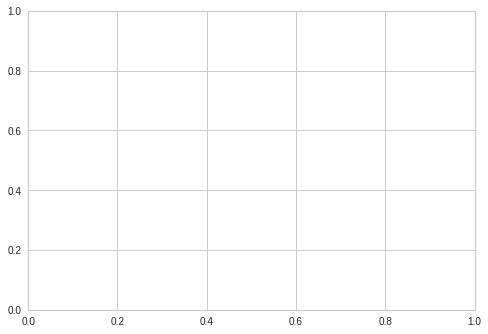

In [ ]:
evaluate_model(knn)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2371,0.0893,0.2988,-0.0801,0.2003,0.1799
1,0.4791,0.3888,0.6235,-0.2061,0.4217,0.1512
2,0.4809,0.5297,0.7278,-0.6758,0.3734,0.2967
3,0.3773,0.2694,0.5190,-0.2121,0.3685,0.1259
4,0.3146,0.1860,0.4313,-0.0255,0.2617,0.2017
Mean,0.3778,0.2926,0.5201,-0.2399,0.3251,0.1911
SD,0.0945,0.1541,0.1488,0.2295,0.0814,0.0587


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

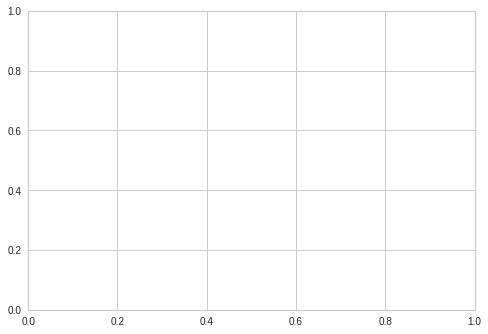

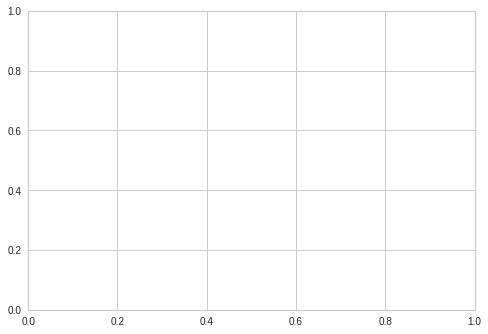

In [ ]:
#Bayesian Ridge
br = create_model("br", fold = 5)
evaluate_model(br)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1300,0.0500,0.2235,0.3953,0.1625,0.0760
1,0.1682,0.0599,0.2448,0.2748,0.1665,0.1270
2,0.7127,0.9183,0.9583,-1.2223,0.5654,0.2450
3,0.4091,0.4230,0.6504,-0.8281,0.3884,0.1957
4,0.1464,0.0628,0.2506,0.8100,0.1746,0.0350
5,0.3764,0.4221,0.6497,-1.1279,0.2914,0.2164
6,0.1600,0.0660,0.2568,0.6674,0.1979,0.0638
7,0.4300,0.4234,0.6507,-0.1137,0.4089,0.1229
8,0.2740,0.1622,0.4027,-0.0137,0.2747,0.2238
9,0.1850,0.0920,0.3034,-0.0226,0.2064,0.1411


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

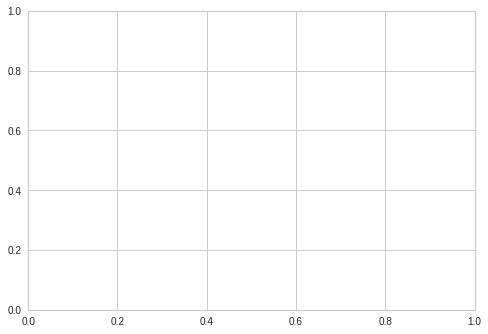

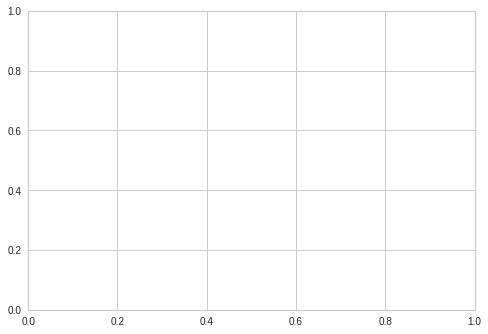

In [ ]:
#Random Forest Regressor
rf = create_model("rf", fold = 10)
evaluate_model(rf)

In [ ]:
#Extra Trees Regressor
et = create_model("et", fold = 10)
evaluate_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0900,0.0251,0.1584,0.6965,0.1107,0.0640
1,0.1309,0.0439,0.2095,0.4687,0.1521,0.0840
2,0.6609,0.8464,0.9200,-1.0482,0.5397,0.2867
3,0.4327,0.4099,0.6402,-0.7712,0.3941,0.2100
4,0.1882,0.1024,0.3199,0.6904,0.2107,0.0519
5,0.3991,0.5324,0.7297,-1.6841,0.3469,0.2200
6,0.1236,0.0596,0.2441,0.6995,0.1930,0.0188
7,0.4809,0.4949,0.7035,-0.3018,0.4374,0.1479
8,0.2390,0.1141,0.3378,0.2869,0.2244,0.2138
9,0.1480,0.0696,0.2637,0.2271,0.1698,0.1411


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…